<h2>1. Data Source

<h2>2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3># Load Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
# Display top 5 data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Checking Dimensions of Dataset
df.shape

(145460, 23)

<h2>3. Data Preprocessing

In [5]:
# Summary of Dataset (DataTypes and attributes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# View Descriptive Stats
df.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


<h2>4. Finding Categorical and Numerical Features in Dataset

<h3># Categorical features in Dataset

In [8]:
categorical = df.columns[df.dtypes=='O']
print("No. of categorical features:", len(categorical))
categorical

No. of categorical features: 7


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

<h3># Numerical Features in Dataset

In [9]:
numerical = df.columns[df.dtypes!='O']
print("No. of numerical features:", len(numerical))
numerical

No. of numerical features: 16


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

<h2>5. Cardinality check for Categorical features

- The accuracy, performance of a classifier not only depends on the model that we use, but also depends on how we preprocess data, and what kind of data you’re feeding to the classifier to learn.
- Many Machine learning algorithms like Linear Regression, Logistic Regression, k-nearest neighbors, etc. can handle only numerical data, so encoding categorical data to numeric becomes a necessary step.  But before jumping into encoding, check the cardinality of each categorical feature.
- Cardinality: The number of unique values in each categorical feature is known as cardinality.
- A feature with a high number of distinct/ unique values is a high cardinality feature. A categorical feature with hundreds of zip codes is the best example of a high cardinality feature.
- This high cardinality feature poses many serious problems like it will increase the number of dimensions of data when that feature is encoded. This is not good for the model.
- There are many ways to handle high cardinality, one would be feature engineering and the other is simply dropping that feature if it doesn’t add any value to the model.<br>
Let’s find the cardinality for Categorical features:

In [10]:
for each_feature in categorical:
    unique_values = len(df[each_feature].unique())
    print(each_feature,":", unique_values)

Date : 3436
Location : 49
WindGustDir : 17
WindDir9am : 17
WindDir3pm : 17
RainToday : 3
RainTomorrow : 3


<h3># Feature Engineering of Date column to decrease high cardianlity

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

Drop Date column

In [12]:
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<h2>6. Handling Missing Values

Machine learning algorithms can’t handle missing values and cause problems. So they need to be addressed in the first place. There are many techniques to identify and impute missing values.

If a dataset contains missing values and loaded using pandas, then missing values get replaced with <b>NaN</b> (Not a Number) values. These NaN values can be identified using methods like <b>isna()</b> or <b>isnull()</b> and they can be imputed using <b>fillna()</b>. This process is known as <b>Missing Data Imputation</b>.

<h3># Handling Missing values in Categorical features

In [13]:
new_categorical = df.columns[df.dtypes=='O']
df[new_categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

<h3># Imputing missing values in categorical features using the most frequent value which is mode

In [14]:
for each_feature in new_categorical:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val, inplace=True)

In [15]:
df[new_categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

<h3># Handling Missing values in Numerical features

In [16]:
new_numerical = df.columns[df.dtypes!='O']
df[new_numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

Missing values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the missing values with mean values, then outliers in numerical features need to be addressed properly.

<h2>7. Outliers detection and treatment

<h3># What is an outlier?</h3>
An Outlier is an observation that lies an abnormal distance from other values in a given sample. They can be detected using visualization(like boxplots, scatter plots), Z-score, statistical and probabilistic algorithms, etc.

<h3># Checking outliers for numerical features

<AxesSubplot:>

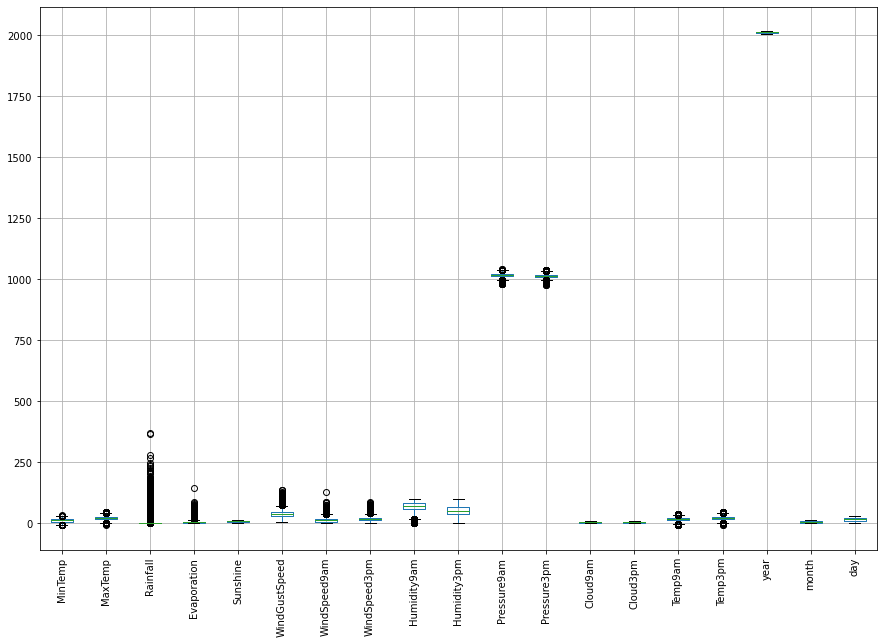

In [17]:
new_numerical = [column for column in df.columns if df[column].dtype!='O']
plt.figure(figsize=(15,10))
df.boxplot(new_numerical, rot=90)

<h3># Remove outliers from Numerical features:

In [18]:
for feature in new_numerical:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

<AxesSubplot:>

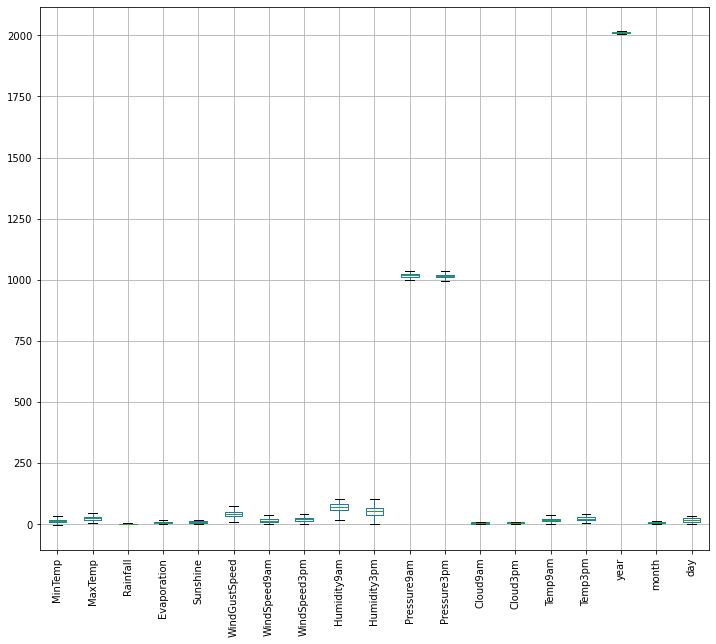

In [19]:
plt.figure(figsize=(12,10))
df.boxplot(new_numerical, rot=90)

<h3># Impute missing values in numerical features using mean

In [20]:
new_numerical_null = [feature for feature in new_numerical if df[feature].isnull().sum()]
for feature in new_numerical_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

<h2>8. Exploratory Data Analysis

Exploratory Data Analysis(EDA) is a teqnique used to analyze, visualize, investigate, interpret, discover and summarize data. It helps Data Scientists to extract trends, patterns and relationships in data. 

<h3>1. Univariate Analysis

<h4>a) Exploring target variable

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

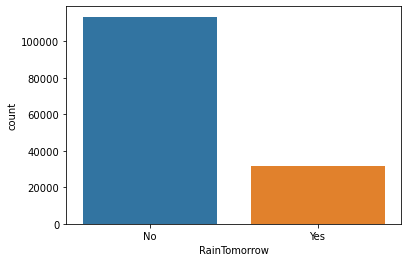

In [21]:
sns.countplot(x="RainTomorrow", data=df)

Looks like the Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the performance of the model. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let me keep it as it is.

<h4>b) Exploring all numerical variables

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

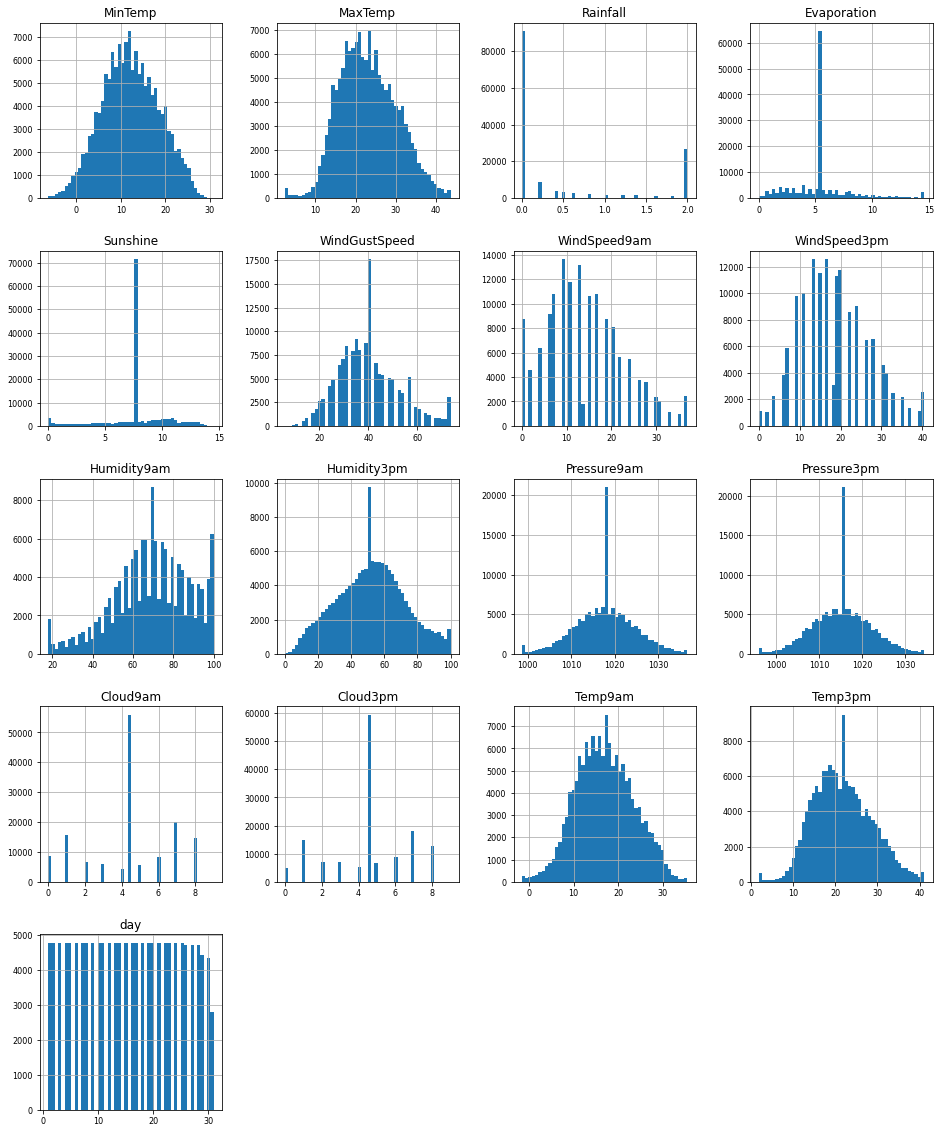

In [22]:
df_num = df.select_dtypes(include = ['float64'])
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

<h3>2. Bi-variate Analysis

<h4>a) Sunhine vs Rainfall

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

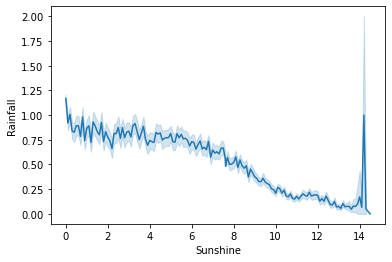

In [23]:
sns.lineplot(x='Sunshine', y='Rainfall', data=df)

In the above line plot, the Sunshine feature is inversely proportional to the Rainfall feature.

<h4>b) Sunshine vs Evaporation

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

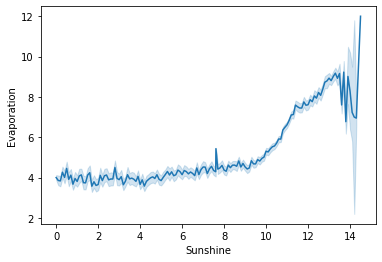

In [24]:
sns.lineplot(x='Sunshine', y='Evaporation', data=df)

In the above line plot, the Sunshine feature is proportional to the Evaporation feature.

<h2>9. Encoding of Categorical Features

Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours, etc. can’t handle categorical data. Hence, these categorical data need to converted to numerical data for modeling, which is called  Feature Encoding.</br>
There are many feature encoding techniques like One code encoding, label encoding. But in this particular blog, I will be using replace() function to encode categorical data to numerical data.

In [40]:
# Encoding Categorical Features using replace fundtion
#df['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)
#df['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)

In [41]:
def encoding(feature): 
    '''
    This function takes feature name as a parameter and returns mapping dictionary to replace or map categorical data with numerical data.
    '''
    mapping = {}
    
    unique_list = list(df[feature].unique()) #getting unique qualitative values
    for index in range(len(unique_list)):
        mapping[unique_list[index]] = index #converting to numerical values
    return mapping

# applying the function to our data
for category in new_categorical:
    df[category].replace(encoding(category), inplace=True)
    
print(df.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         0     13.4     22.9       0.6     5.318667  7.611178            0   
1         0      7.4     25.1       0.0     5.318667  7.611178            1   
2         0     12.9     25.7       0.0     5.318667  7.611178            2   
3         0      9.2     28.0       0.0     5.318667  7.611178            3   
4         0     17.5     32.3       1.0     5.318667  7.611178            0   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0           0           0  ...       1007.1  8.000000   
1           44.0           1           1  ...       1007.8  4.447461   
2           46.0           0           1  ...       1008.7  4.447461   
3           24.0           2           2  ...       1012.8  4.447461   
4           41.0           3           3  ...       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0   4.50993     1

<h2>10. Correlation using heatmap</h2>
</br>
Correlation is a statistic that helps to measure the strength of the relationship between two features. It is used in bivariate analysis. Correlation can be calculated with method corr() in pandas.

<AxesSubplot:>

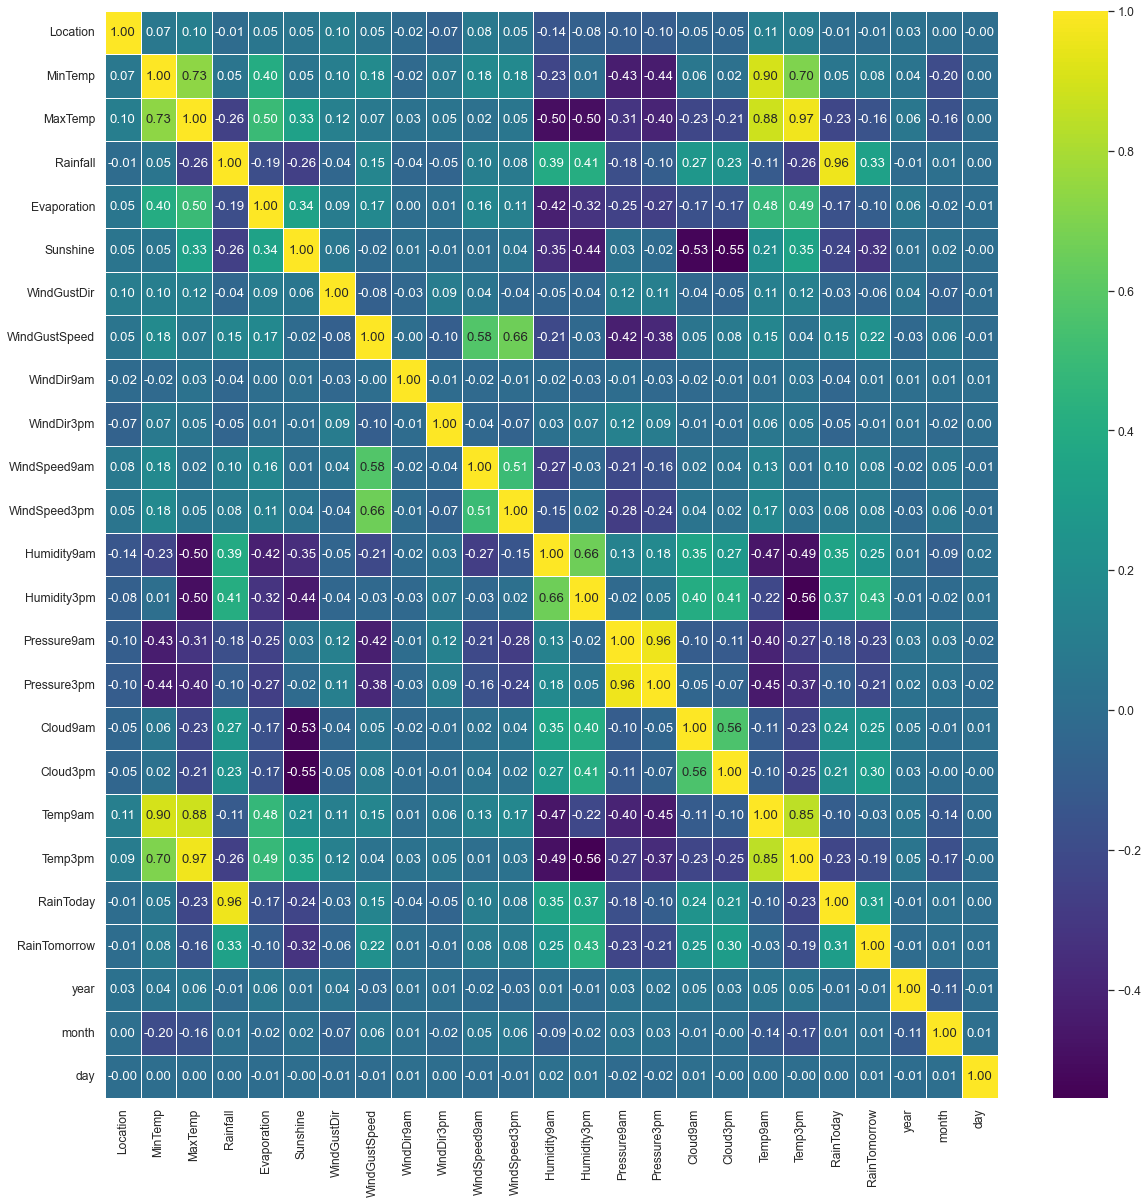

In [42]:
sns.set(font_scale=1.10)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidth=0.5, annot=True, fmt=".2f", cmap='viridis')

<h3># Splitting data into Independent Features and Dependent Features

For feature importance and feature scaling, we need to split data into independent and dependent features.

In [27]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In the above code,</br>
X - Independent Features or Input Features</br>
y - Dependent Features or target label

<h2>11. Feature Importance</h2>
</br>
<ul>
<li>Machine Learning Model performance depends on features that are used to train a model. Feature importance describes which features are relevant to build a model.</li>
<li>Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are at predicting a target variable. Feature importance helps in Feature Selection.</li>
</ul>
</br>
We’ll be using <b>ExtraTreesRegressor</b> class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.03456141, 0.03025055, 0.02887103, 0.04064399, 0.02347527,
       0.04317327, 0.03005756, 0.05671708, 0.03034258, 0.03162543,
       0.03101298, 0.03240119, 0.03718068, 0.20524532, 0.0354176 ,
       0.05051572, 0.02398516, 0.03515113, 0.02789667, 0.0283027 ,
       0.0492056 , 0.03089893, 0.03051966, 0.03254848])

let's visualize feature importance values

Text(0.5, 1.0, 'Visualizing Important Features')

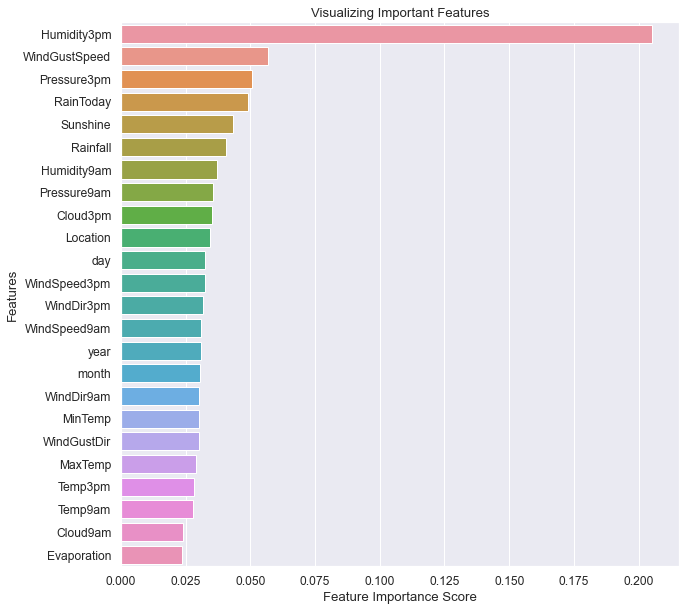

In [29]:
plt.figure(figsize=(10,10))
feature_imp = pd.Series(etr_model.feature_importances_, index=X.columns).sort_values(ascending=False)
#feature_imp.nlargest().plot(kind='barh')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

<h2>12. Splitting Data into training and testing set

<b>train_test_split()</b> is a method of model_selection class used to split data into training and testing sets.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Length of Training and Testing set

In [31]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


<h2>13. Feature Scaling

<b>Feature Scaling</b> is a technique used to scale, normalize, standardize data in range(0,1). When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. <b>StandardScaler</b> is a class used to implement feature scaling.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

<h2>14. Model Building

<h3>(i) Logistic Regression

In this article, I will be using a Logistic Regression algorithm to build a predictive model to predict whether or not it will rain tomorrow in Australia.
<ul>
<li>Logistic Regression: It is a statistic-based algorithm used in classification problems. It allows us to predict the probability of an input belongs to a certain category.</li>
<li>It uses the logit function or sigmoid function as a core.</b>
<li>According to the Data science community, logistic regression can solve 60% of existing classification problems.</li>
</ul>

<h4># Model Training

Sklearn library has a module called <b>linear_model</b>, which provides <b>LogisticRegression</b> class to train a model or a classifier and test it.

In [34]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

<h4># Model Testing

In [35]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h3># Evaluating Model Performance

<b>accuracy_score()</b> is a method used to calculate the accracy of a model prediction on unseen data.

In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8444933315000688


<h4># Checking for Underfitting and Overfitting

In [37]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


The accuracy Score of training and testing data is comparable and almost equal. So, there is no question of underfitting and overfitting. And the model is generalizing well for new unseen data.

<h4># Confusion Matrix

A Confusion Matrix is used to summarize the performance of the classification problem. It gives a holistic view of how well the model is performing.

In [51]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:

print("Confusion Matrix:","\n\n",confusion_matrix(y_test, y_pred))

Confusion Matrix: 

 [[21536  1190]
 [ 3334  3032]]


<h4># Classification Report

The classification report displays the values of precision, recall, F1 for the model.

In [52]:
from sklearn.metrics import classification_report
# classification report:

print("classification_report:\n\n", classification_report(y_test, y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



<h4># Receiver operating characteristic(ROC) curve

In [53]:
# Predicting probabilities

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [54]:
# Finding True Positive Rate (tpr), False Positive Rate (fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

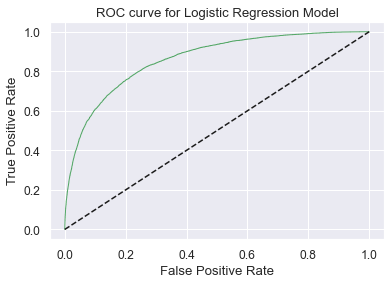

In [55]:
# Plotting ROC curve

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<ul>
<li>The ROC curve is an evaluation metric used in <b>binary classification</b> problems to know the performance of the classifier.</li>
<li>It is a curve plotted between <b>True Positive Rate(TPR)</b> and <b>False Positive Rate(FPR)</b> at various thresholds.</li>
<li>ROC graph summarizes all the confusion matrices produced at different threshold values.</li>
<li>ROC curve is used to determine which threshold value is best for <b>Logistic Regression</b> in order to classify classes.</li>
</ul>

In [57]:
# Finding roc_auc_score:

from sklearn.metrics import roc_auc_score

print('roc auc score:{}'.format(roc_auc_score(y_test, y_pred)))

roc auc score:0.7119586532221237


<h4># Cross-Validation

Let's find out whether model performance can be improved using Cross-Validation Score

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier_logreg, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score:{}'.format(scores.mean()))

Cross-validation scores:[0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]
Average cross-validation score:0.8433847578355673


This means accuracy score of cross-validation is almost the same as the original model accuracy score which is 0.8445. So, the accuracy of the model may not be improved using Cross-validation.

<h3>(ii) Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
import time
import pickle

<h4># Model Training

In [64]:
start_time = time.time()
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
end_time = time.time()

In [69]:
print('Time taken to train: {}'.format(end_time - start_time))

Time taken to train: 16.936843872070312


<h4># Model Testing

In [70]:
y_pred_rf = classifier_rf.predict(X_test)

In [71]:
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred_rf)))

Accuracy score: 0.8561803932352536


<h4># Checking for Overfitting and Under fitting

In [74]:
print("Train Data score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data score: 0.9999914065722535
Test Data Score: 0.8561803932352536


Accuracy score for training set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training and testing accuracy is not minimum.

<h2>15. Results and Conclusion

Althogh the accuracy score of Random Forest classifier with 0.86 is higher than logistic Regression classifier with 0.84, however, the Random Forest model accuracy score for training set is almost 1 or 100% which seems like model is overfitting whereas on the other hand Logistic Regression model shows no sign of underfitting for overfitting. This means Logistic Regression model is generalizing well for unseen data and good for prediction. Moreover, the mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using cross-validation technique.